# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# $S^3$

In [2]:
def f(r):
    return r[0]**2+r[1]**2+r[2]**2+r[3]**2-1
G = (f,)

a.
- - -
Modifique el código de la clase para que $S^3$ sea el único elemento del vector de
funciones.

In [3]:
def GetVectorF(G,r):
    v = G[0](r)
    return np.array([v])
    

b.
- - -
Calcule la métrica de minimización como la magnitud del vector de funciones.

In [4]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return np.linalg.norm(v)

c.
- - -
Modifique el Jacobiano a una dimensión $(1 \times 4)$.

In [5]:
def GetJacobian(G,r,h=1e-6):
    dim = len(G)
    J = np.zeros((dim,4))
    
    for i in range(dim):
        for j in range(4):
            aux = np.zeros(4)
            aux[j] = h
            J[i,j] = (  G[i](r+aux) - G[i](r-aux) )/(2*h)
        
    return J.T

d.
- - -
Genere un punto aleatorio uniformemente distribuido en $R^4$ (es decir, un vector aleatorio de 4 componentes) en el intervalo [-1,1].

In [6]:
def Point(Min=-1,Max=1):
    p = [np.random.uniform(Min,Max),np.random.uniform(Min,Max),np.random.uniform(Min,Max),np.random.uniform(Min,Max)]
    return p

e.
- - -
Corra el algoritmo de aprendizaje para que el vector aleatorio se ubique en algún punto de $S^3$.

In [7]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        CurrentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        GVector = GetVectorF(G,r)

        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        R_vector = np.vstack((R_vector,r))
        NewF = GetMetric(G,r)
        
        Vector_F = np.append(Vector_F,NewF)
        d = np.abs( CurrentF - NewF )/NewF
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

f. y g.
- - -
- Repita el proceso de aprendizaje para al menos $10^3$ points.
- Verifique que los points obtenidos pertenezcan a la 3-esfera.

In [8]:
N = 1e3
points = np.zeros((int(N),4))

for i in range(int(N)):
    sol,it,vect,rvect=GetSolve(G,Point())
    points[i,0]= sol[0]
    points[i,1]= sol[1]
    points[i,2]= sol[2]
    points[i,3]= sol[3]

 Entrenamiento completo  0.0 iteraciones 7255
 Entrenamiento completo  0.0 iteraciones 7464
 Entrenamiento completo  0.0 iteraciones 7609
 Entrenamiento completo  0.0 iteraciones 7218
 Entrenamiento completo  0.0 iteraciones 7419
 Entrenamiento completo  0.0 iteraciones 7499
 Entrenamiento completo  0.0 iteraciones 7518
 Entrenamiento completo  0.0 iteraciones 7145
 Entrenamiento completo  0.0 iteraciones 6530
 Entrenamiento completo  0.0 iteraciones 7418
 Entrenamiento completo  0.0 iteraciones 7180
 Entrenamiento completo  0.0 iteraciones 7468
 Entrenamiento completo  0.0 iteraciones 7957
 Entrenamiento completo  0.0 iteraciones 7427
 Entrenamiento completo  0.0 iteraciones 7622
 Entrenamiento completo  0.0 iteraciones 7844
 Entrenamiento completo  0.0 iteraciones 6900
 Entrenamiento completo  0.0 iteraciones 7028
 Entrenamiento completo  0.0 iteraciones 7202
 Entrenamiento completo  0.0 iteraciones 7777
 Entrenamiento completo  0.0 iteraciones 7466
 Entrenamiento completo  0.0 itera

h.
- - -
Con los points obtenidos de $S^3$, dibuje la proyección espacial (X, Y, Z), es decir, las primeras tres columnas. ¿Qué figura geométrica resulta?

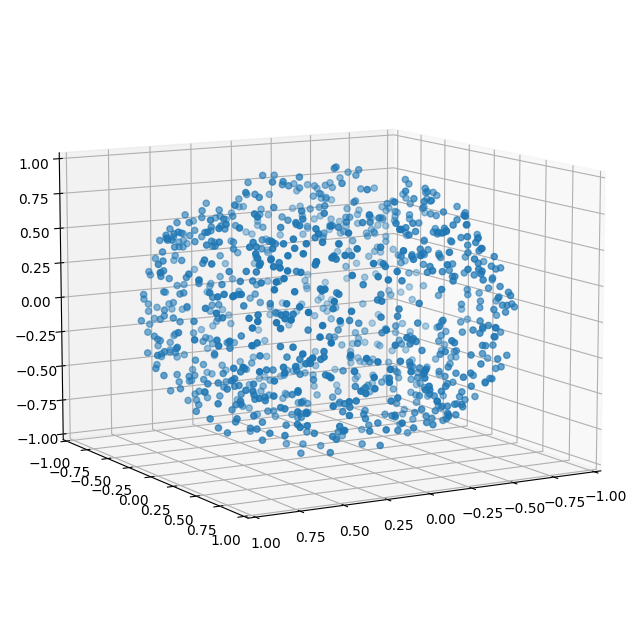

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.view_init(10, 60)
X=points[:,0]
Y=points[:,1]
Z=points[:,2]
ax.scatter(X,Y,Z)
plt.show()

Casi una esfera, funciona